In [34]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
import datetime
# import pandas_datareader as dr
import matplotlib.ticker as ticker
from itertools import cycle

In [36]:
dataset = read_csv('shopping_behavior_updated.csv')

In [38]:
dataset.shape

(3900, 18)

In [40]:
X = dataset.drop(['Customer ID'],axis=1)

In [42]:
print('Null Values =',dataset.isnull().values.any())


Null Values = False


In [44]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['number']).columns.tolist()

In [50]:
# Encode categorical variables and scale numerical ones
label_encoders = {col: LabelEncoder().fit(X[col]) for col in categorical_cols}
# scalers = {col: StandardScaler().fit(df[[col]]) for col in numerical_cols}
scalers = {col: StandardScaler().fit(X[[col]]) for col in numerical_cols}

X_encoded = X.copy()
for col, encoder in label_encoders.items():
    X_encoded[col] = encoder.transform(X[col])
for col, scaler in scalers.items():
    X_encoded[col] = scaler.transform(X[[col]])

In [54]:
nclust=7
#Fit with k-means
k_means = cluster.KMeans(n_clusters=4)
k_means.fit(X_encoded)

KMeans(n_clusters=4)

In [60]:
#Extracting labels
target_labels = k_means.predict(X_encoded)

In [66]:
ap = AffinityPropagation()
ap.fit(X_encoded)
clust_labels2 = ap.predict(X_encoded)
cluster_centers_indices = ap.cluster_centers_indices_
labels = ap.labels_
n_clusters_ = len(cluster_centers_indices)
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 89


In [70]:
from sklearn import metrics
print("km", metrics.silhouette_score(X_encoded, k_means.labels_))
print("ap", metrics.silhouette_score(X_encoded, ap.labels_))


km 0.20690621738452125
ap 0.09970488437158664


In [74]:
cluster_output= pd.concat([pd.DataFrame(X_encoded), pd.DataFrame(k_means.labels_, \
 columns = ['cluster'])],axis=1)
output=cluster_output.groupby('cluster').mean()

<Axes: xlabel='cluster'>

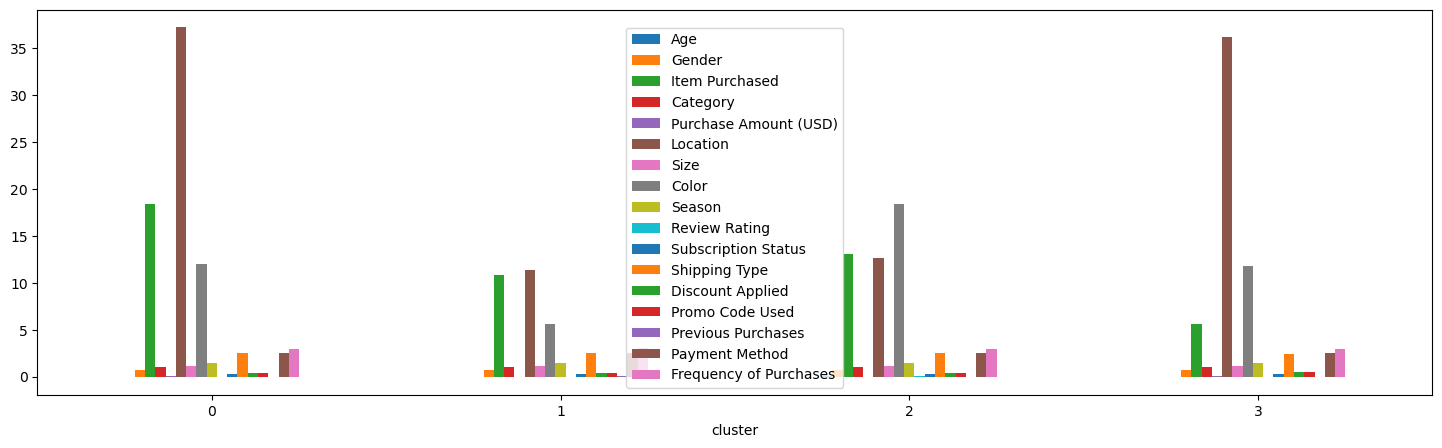

In [76]:
output.plot.bar(rot=0, figsize=(18,5))